## Comparing the data produced by Marilyn Ferland to the obsflow output

### Load and display Marilyn's extract data

'AHCCD Marilyn'

<xarray.Dataset>
Dimensions:       (station: 146, time: 2182)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) |S7 b'7088760' b'7056930' ... b'7065639' b'7067658'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1840-03-01 1840-04-01 ... 2021-12-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    tg_mean       (station, time) float64 ...
    tn_mean       (station, time) float64 ...
    tx_mean       (station, time) float64 ...
Attributes:
    cell_methods:    time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 12:25:39] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'ERA5-LAND Marilyn'

<xarray.Dataset>
Dimensions:  (lat: 176, lon: 227, time: 872)
Coordinates:
  * lat      (lat) float32 45.0 45.1 45.2 45.3 45.4 ... 62.1 62.2 62.3 62.4 62.5
  * lon      (lon) float32 -79.6 -79.5 -79.4 -79.3 ... -57.3 -57.2 -57.1 -57.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-08-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes:
    cell_methods:   time: point time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 13:19:23] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'ERA5-LAND Marilyn'

'RDRS Marilyn'

<xarray.Dataset>
Dimensions:       (rlat: 189, rlon: 162, time: 468)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.52 -11.43 -11.34 -11.25 ... 5.22 5.31 5.4
  * rlon          (rlon) float32 366.6 366.7 366.8 366.9 ... 380.9 381.0 381.1
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 ...
    tn_mean       (time, rlat, rlon) float32 ...
    tx_mean       (time, rlat, rlon) float32 ...
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 12:29:20] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'RDRS Marilyn'

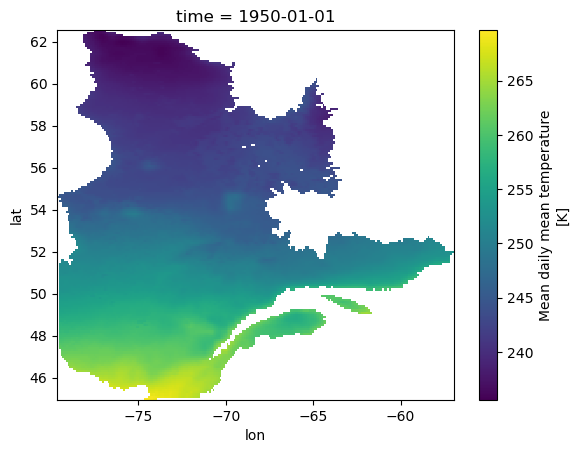

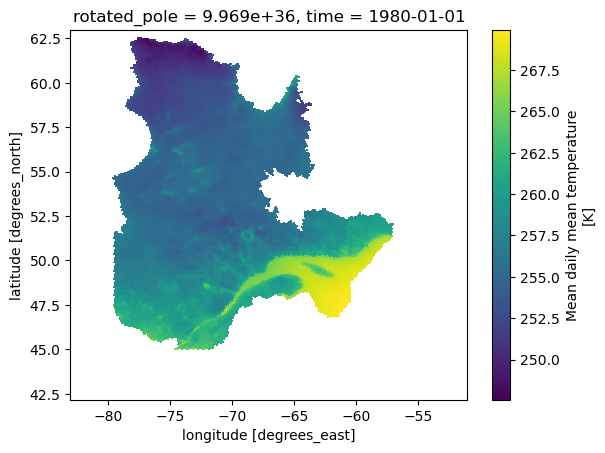

In [45]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

mf_dir = Path('/scen3/braun/data/obs_synthese23/data_marilyn/data/')
data_mf = ['AHCCD/months/mean/AHCCD_gen3_day_temperature_monthly_temp_mean.zarr', 'ERA5-LAND/months/mean/ECMWF_ERA5-Land_monthly_temp_mean.zarr', 'RDRS/months/mean/GouvCan_RDRS_monthly_temp_mean.zarr']

for d in data_mf:
    ds = xr.open_dataset(mf_dir / d, engine='zarr')
    display(f'{d.split("/")[0]} Marilyn', ds)
    if 'AHCCD' in d: continue
    plt.figure()
    display(f'{d.split("/")[0]} Marilyn', ds.tg_mean.isel(time=0).plot(x='lon', y='lat'))

### Load and display obsflow extract data

In [24]:
# load data extracted from obsflow
import xscen as xs

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
#display(pcat.df)
ds_dict = pcat.search(processing_level='extracted').to_dataset_dict()

for ds_id, ds_in in sorted(ds_dict.items()):
    if 'MRCC' in ds_id: continue
    display(ds_id, ds_in)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


'ECMWF_ERA5-Land_NAM.Quebec.extracted.D'

<xarray.Dataset>
Dimensions:  (lat: 179, lon: 230, time: 26571)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5 62.6 62.7
  * lon      (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2022-09-30
Data variables:
    crs      int64 ...
    pr       (time, lat, lon) float32 dask.array<chunksize=(26571, 30, 30), meta=np.ndarray>
    tas      (time, lat, lon) float32 dask.array<chunksize=(26571, 30, 30), meta=np.ndarray>
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(26571, 30, 30), meta=np.ndarray>
    tasmin   (time, lat, lon) float32 dask.array<chunksize=(26571, 30, 30), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    table_id:                ECMWF
    type:                    reconstruction
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:date_start:          1950-01-01 00:00:00
    cat:date_end:            2022-09-30 00:00:00
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/ECMWF...

'GovCan_AHCCD_CAN.Quebec.extracted.D'

<xarray.Dataset>
Dimensions:       (station: 146, time: 66415)
Coordinates: (12/16)
    elev          (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    frommonth     (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    fromyear      (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    joined        (station) object dask.array<chunksize=(146,), meta=np.ndarray>
    lat           (station) float64 dask.array<chunksize=(146,), meta=np.ndarray>
    lon           (station) float64 dask.array<chunksize=(146,), meta=np.ndarray>
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object dask.array<chunksize=(146,), meta=np.ndarray>
    stnid         (station) object dask.array<chunksize=(146,), meta=np.ndarray>
  * time          (time) datetime64[ns] 1840-03-01 1840-03-02 ... 2021-12-31
    tomonth       (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    toyear        (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
Data variables:
    crs           int64 ...
    tas           (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
    tasmax        (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
    tasmin        (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1840-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN
    ...                      ...
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs
    intake_esm_vars:         ('tasmin', 'tasmax', 'tas')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

'GovCan_RDRS_NAM.Quebec.extracted.D'

<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 164, time: 14245)
Coordinates:
    lat           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.5 366.6 366.7 366.8 ... 381.0 381.1 381.2
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
Data variables:
    crs           int64 ...
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(14245, 30, 30), meta=np.ndarray>
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(14245, 30, 30), meta=np.ndarray>
    tasmax        (time, rlat, rlon) float32 dask.array<chunksize=(14245, 30, 30), meta=np.ndarray>
    tasmin        (time, rlat, rlon) float32 dask.array<chunksize=(14245, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


'ECMWF_ERA5-Land_NAM obsflow'

<xarray.Dataset>
Dimensions:  (time: 872, lat: 41, lon: 41)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-08-01
Data variables:
    pr       (time, lat, lon) float32 4.102e-05 4.089e-05 ... 3.791e-05
    tas      (time, lat, lon) float32 262.3 262.2 262.2 ... 9.969e+36 9.969e+36
    tasmax   (time, lat, lon) float32 268.8 268.6 268.4 ... 9.969e+36 9.969e+36
    tasmin   (time, lat, lon) float32 256.3 256.5 256.7 ... 9.969e+36 9.969e+36
    crs      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    table_id:                ECMWF
    type:                    reconstruction
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:date_start:          1950-01-01 00:00:00
    cat:date_end:            2022-09-30 00:00:00
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/ECMWF...

'ECMWF_ERA5-Land_NAM Marilyn'

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 41, time: 872)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-08-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes:
    cell_methods:   time: point time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 13:19:23] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

Display the datasets and their difference at 3 random times


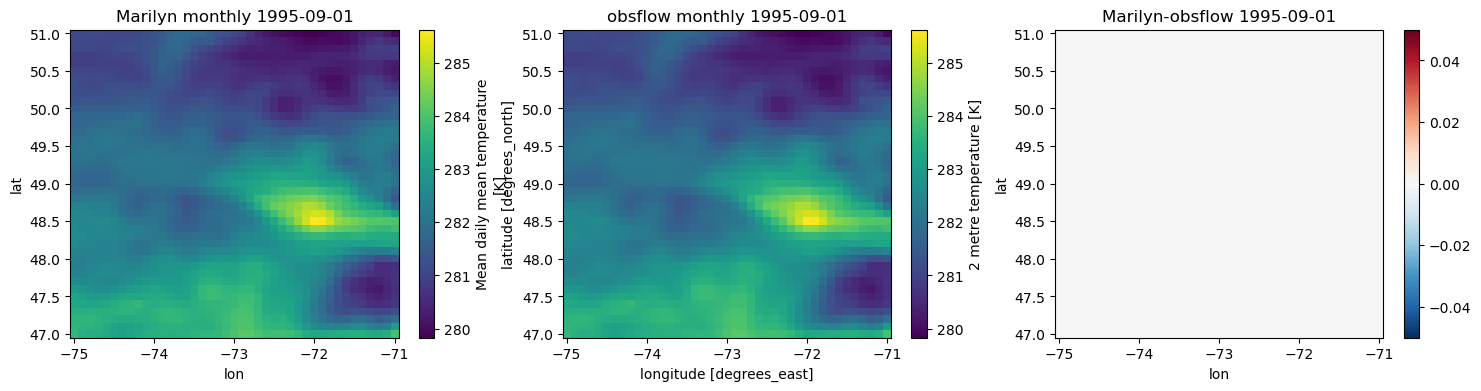

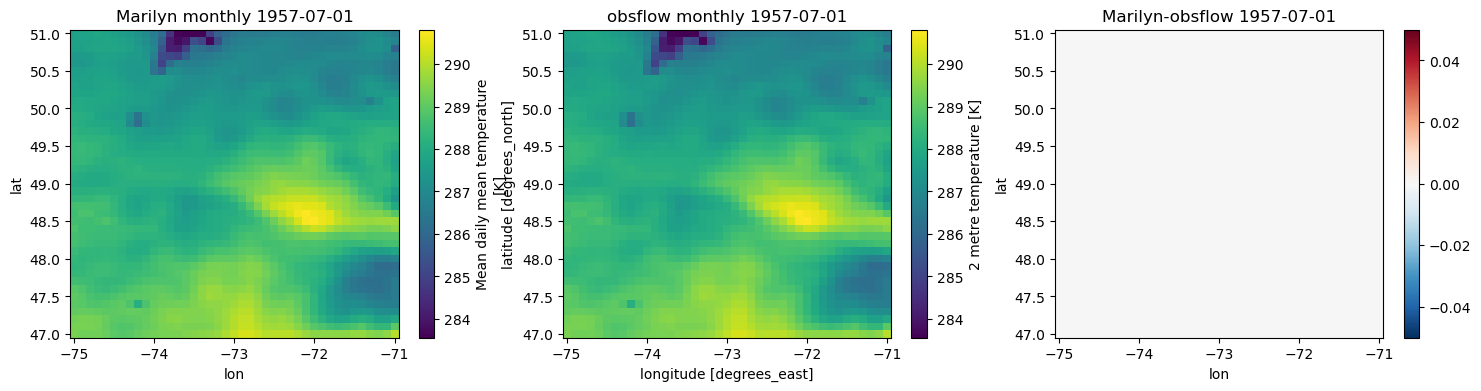

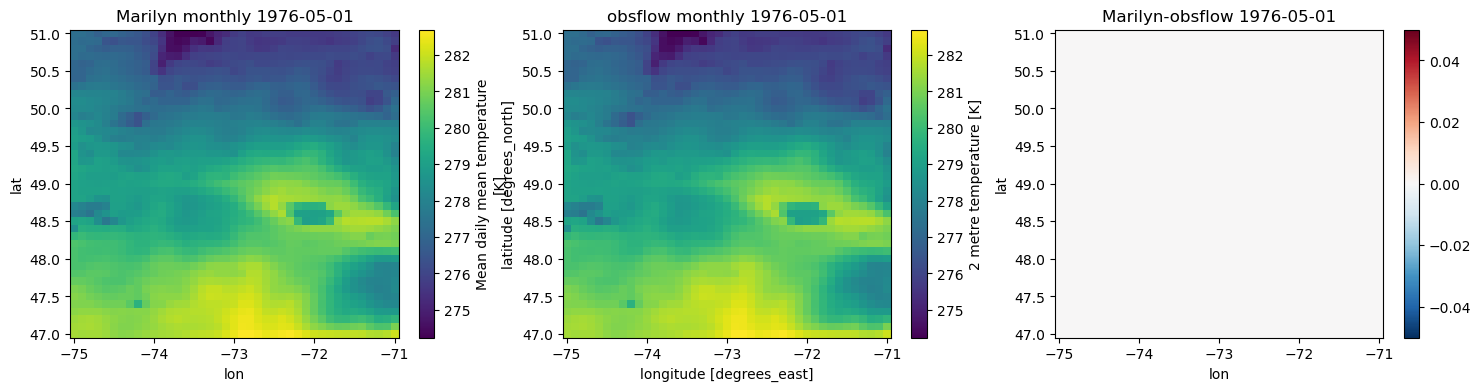

'GovCan_RDRS_NAM obsflow'

<xarray.Dataset>
Dimensions:       (time: 468, rlat: 51, rlon: 41)
Coordinates:
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    pr            (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tas           (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmax        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmin        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    crs           (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

'GovCan_RDRS_NAM Marilyn'

<xarray.Dataset>
Dimensions:       (rlat: 51, rlon: 41, time: 468)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tn_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tx_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 12:29:20] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

Display the datasets and their difference at 3 random times


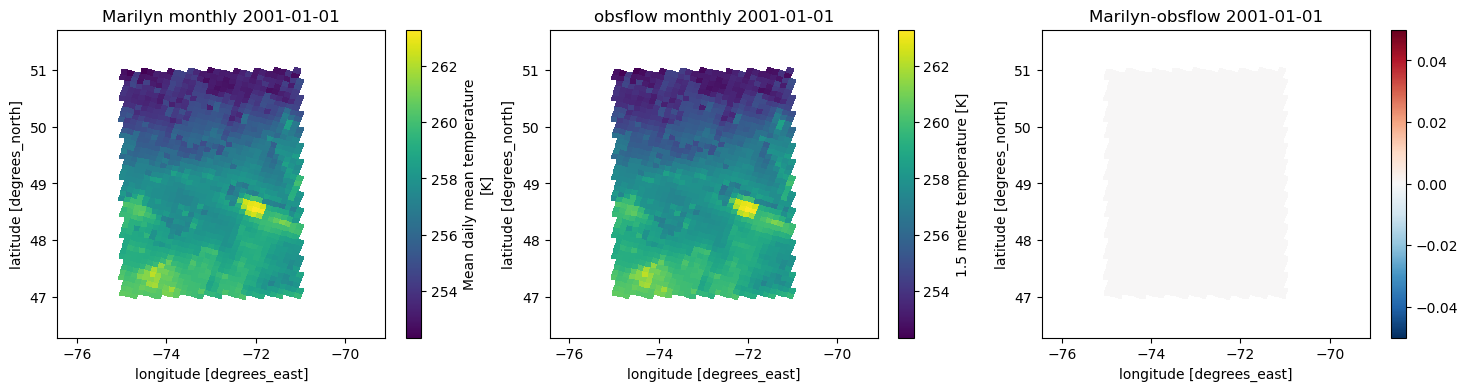

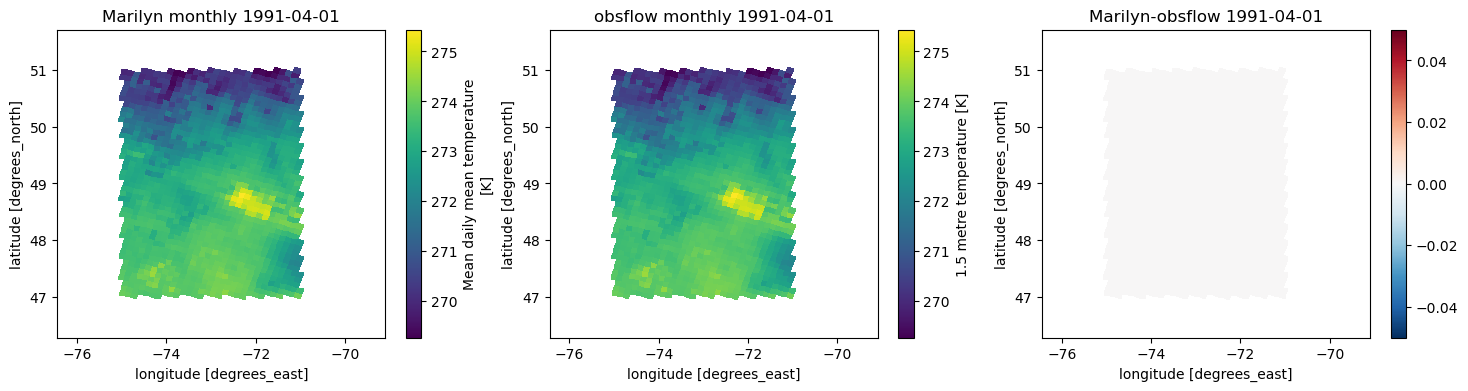

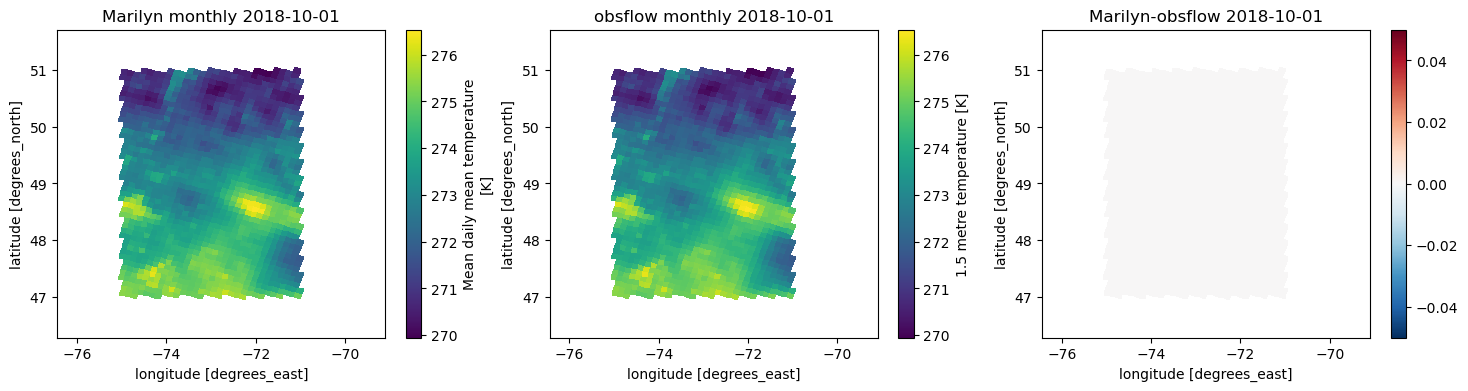

'ECMWF_ERA5-Land_NAM obsflow'

<xarray.Dataset>
Dimensions:  (time: 291, lat: 41, lon: 41)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2022-06-01
Data variables:
    pr       (time, lat, lon) float32 3.305e-05 3.308e-05 ... 5.549e-05
    tas      (time, lat, lon) float32 260.7 260.7 260.7 ... 1.608e+35 1.608e+35
    tasmax   (time, lat, lon) float32 266.9 266.7 266.4 ... 1.608e+35 1.608e+35
    tasmin   (time, lat, lon) float32 255.2 255.4 255.7 ... 1.608e+35 1.608e+35
    crs      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    table_id:                ECMWF
    type:                    reconstruction
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:date_start:          1950-01-01 00:00:00
    cat:date_end:            2022-09-30 00:00:00
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/ECMWF...

'ECMWF_ERA5-Land_NAM Marilyn'

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 41, time: 291)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2022-06-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes:
    cell_methods:   time: point time: mean over days
    description:    Seasonal mean of daily minimum temperature.
    history:        [2023-07-03 13:00:10] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

Display the datasets and their difference at 3 random times


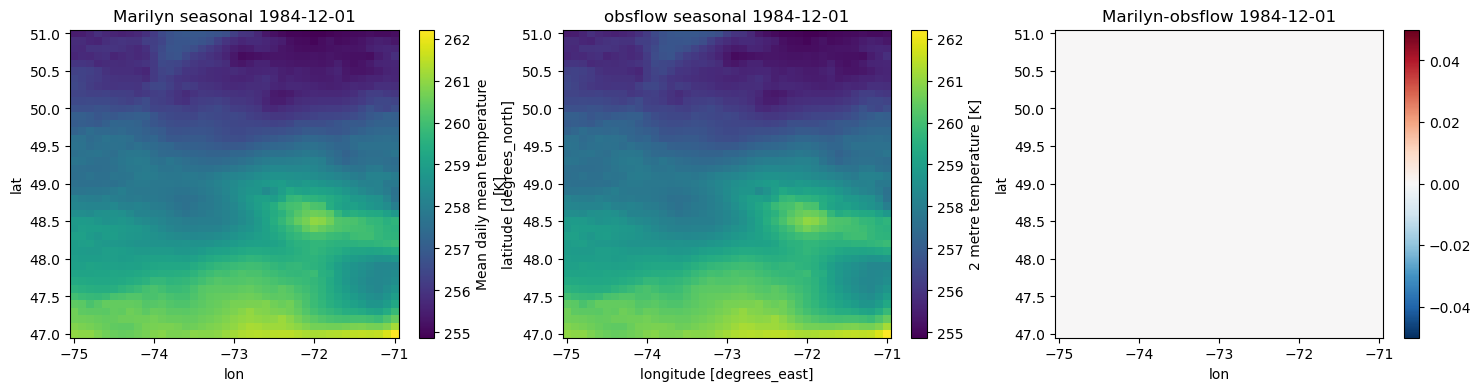

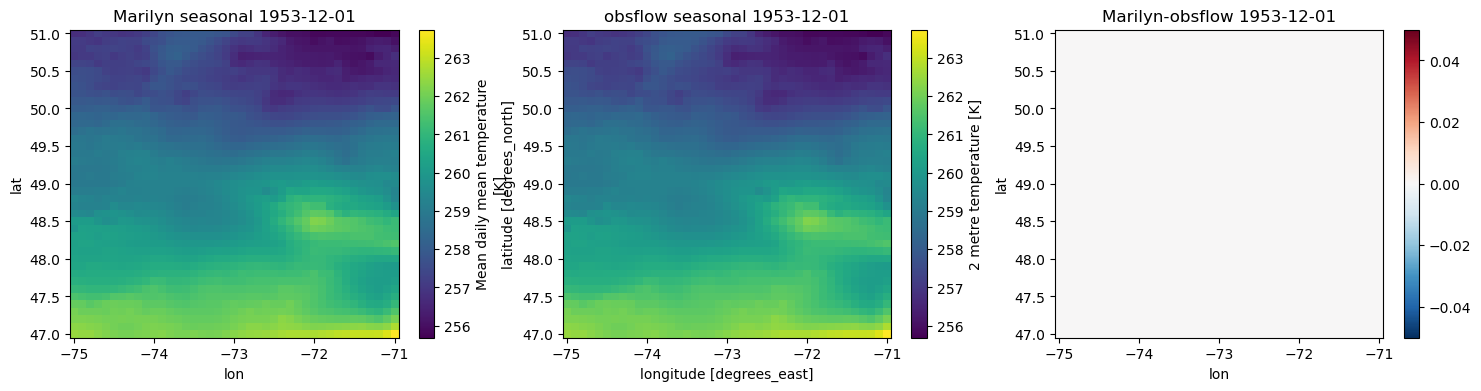

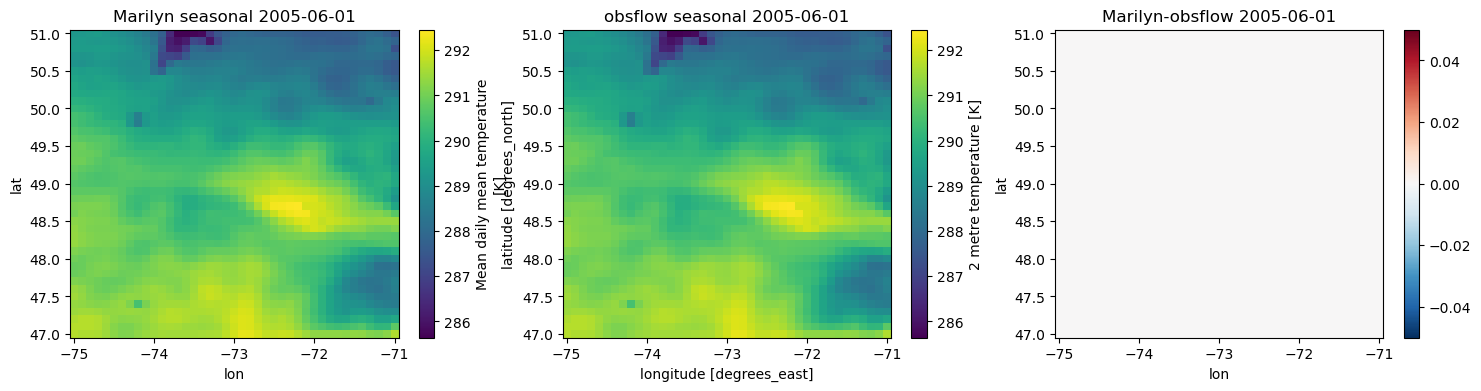

'GovCan_RDRS_NAM obsflow'

<xarray.Dataset>
Dimensions:       (time: 157, rlat: 51, rlon: 41)
Coordinates:
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    pr            (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tas           (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmax        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmin        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    crs           (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tas', 'tasmin', 'tasmax', 'pr')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

'GovCan_RDRS_NAM Marilyn'

<xarray.Dataset>
Dimensions:       (rlat: 51, rlon: 41, time: 157)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tn_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tx_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Seasonal mean of daily minimum temperature.
    history:        [2023-07-03 11:53:09] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

Display the datasets and their difference at 3 random times


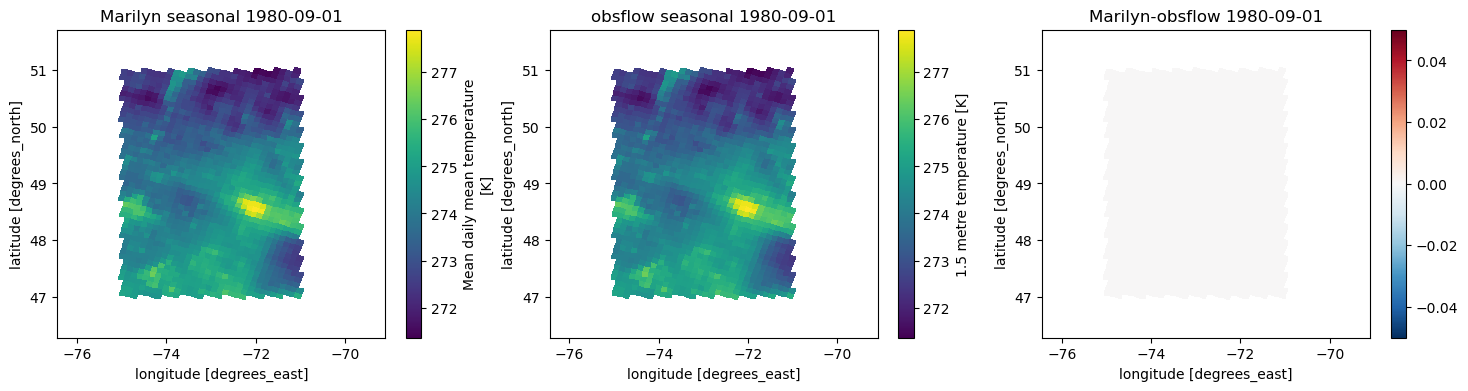

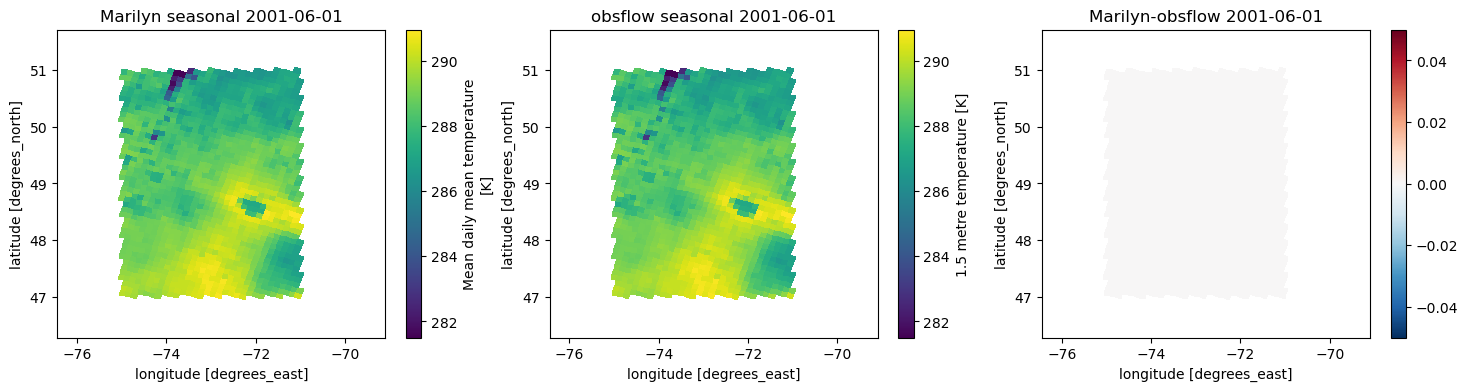

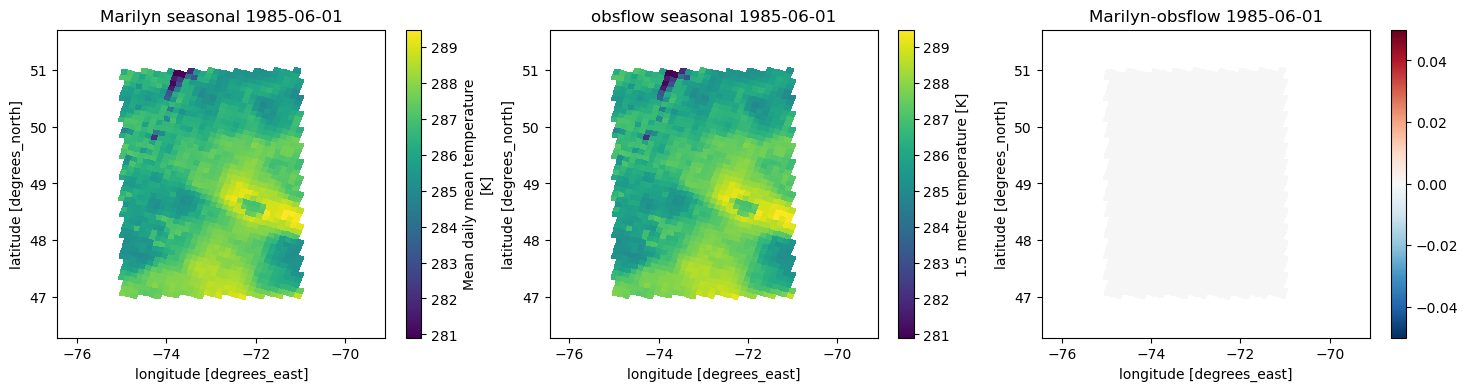

In [72]:
import xarray as xr
from pathlib import Path
from clisops.core.subset import subset_bbox
import matplotlib.pyplot as plt
import xscen as xs
import random

#ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/RDRS/RDRS_qc_data.zarr', engine='zarr')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/ERA5-LAND/era5_land_qc_data.nc')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/ERA5-LAND/months/mean/ERA5_LAND_mean_temperature_yearly_JAN.zarr', engine='zarr')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/RDRS/months/mean/RDRS_mean_temperature_yearly_JUN.zarr', engine='zarr')
# ds

mf_dir = Path('/scen3/braun/data/obs_synthese23/data_marilyn/data/')
data_mf = {'monthly' : ['AHCCD/months/mean/AHCCD_gen3_day_temperature_monthly_temp_mean.zarr', 'ERA5-LAND/months/mean/ECMWF_ERA5-Land_monthly_temp_mean.zarr', 'RDRS/months/mean/GouvCan_RDRS_monthly_temp_mean.zarr'], 
           'seasonal': ['AHCCD/seasons/mean/AHCCD_gen3_day_temperature_seasonal_temp_mean.zarr', 'ERA5-LAND/seasons/mean/ECMWF_ERA5-Land_seasonal_temp_mean.zarr', 'RDRS/seasons/mean/GouvCan_RDRS_seasonal_temp_mean.zarr']}
data_of = ['GovCan_AHCCD_CAN.Quebec.extracted.D',  'ECMWF_ERA5-Land_NAM.Quebec.extracted.D', 'GovCan_RDRS_NAM.Quebec.extracted.D']
tmp_agg = {'monthly': 'MS', 'seasonal': 'QS-DEC'}
#tmp_res = 'seasonal'

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
#display(pcat.df)
ds_dict = pcat.search(processing_level='extracted').to_dataset_dict()

for tmp_res in ['monthly', 'seasonal']:
    # iterate over both datasets
    for mf, of in zip(data_mf[tmp_res], data_of):
        if 'AHCCD' in mf: continue
        my_bbox = {'lon_bnds': [-75, -71], 'lat_bnds' : [47, 51]}
        ds_mf = xr.open_dataset(mf_dir / mf, engine='zarr')
        ds_mf = subset_bbox(ds_mf, **my_bbox) 
        display(f'{of.split(".")[0]} {tmp_res} Marilyn', ds_mf)
        ds_of = ds_dict[of].sel(time=slice('2022-08-31')).resample(time=tmp_agg[tmp_res]).mean()
        ds_of = subset_bbox(ds_of, **my_bbox)
        display(f'{of.split(".")[0]} {tmp_res} obsflow', ds_of.compute())
        
        print('Display the datasets and their difference at 3 random times')
        diff = ds_mf.tg_mean - ds_of.tas
        for t in [random.randint(0, ds_mf.time.size) for _ in range(3)]:
            fig, ax = plt.subplots(1, 3, figsize=(18, 4))
            ds_mf.tg_mean.isel(time=t).plot(ax=ax[0], x='lon', y='lat')
            ax[0].set_title(f'Marilyn {tmp_res} {ds_mf.time[t].dt.strftime("%Y-%m-%d").item()}')
            ds_of.tas.isel(time=t).plot(ax=ax[1], x='lon', y='lat')
            ax[1].set_title(f'obsflow {tmp_res} {ds_of.time[t].dt.strftime("%Y-%m-%d").item()}')
            diff.isel(time=t).plot(ax=ax[2], x='lon', y='lat', cmap='RdBu_r')
            ax[2].set_title(f'Marilyn-obsflow {ds_mf.time[t].dt.strftime("%Y-%m-%d").item()}')
            plt.show()